In [1]:
import nltk 
from nltk.book import *
from nltk.tokenize import word_tokenize 
from collections import Counter
import string

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
freqdist = nltk.FreqDist(text6)
hapaxes = freqdist.hapaxes()

hapaxes5 = [word for word, freq in freqdist.items() if freq < 5]

print("Hapaxes:")
print(len(hapaxes))

print("less than 5 times:")
print(len(hapaxes5))

Hapaxes:
1153
less than 5 times:
1733


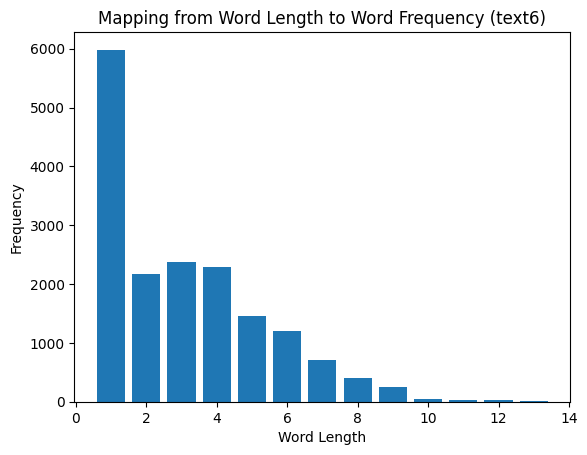

In [4]:
import matplotlib.pyplot as plt

word_length = [len(word) for word in text6]


frequency_distribution = nltk.FreqDist(word_length)

plt.bar(frequency_distribution.keys(), frequency_distribution.values())
plt.title('Mapping from Word Length to Word Frequency (text6)')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()


In [86]:
sentence_endings = ('.', '!', '?')
end_words = [word.lower() for word in text6 if any(word.endswith(ending) for ending in sentence_endings)]
end_fd = FreqDist(end_words)
most_common_end_words = end_fd.most_common(10)

print("10 most frequent words occurring at the end of the sentence:", most_common_end_words)

10 most frequent words occurring at the end of the sentence: [('.', 816), ('!', 801), ('?', 207), ('...', 118), ("'.", 19), ('?!', 12), ('..', 3), ("'!", 3), ("'?", 3), ('[...', 1)]


In [88]:
text6.findall("(<.*>)<[!?\.]>")

there; Halt; there; Camelot; England; one; Patsy; Camelot; master;
What; horse; Yes; coconuts; What; together; So; coconuts; them; them;
Mercea; tropical; mean; zone; land; migrate; all; carried; What;
coconut; husk; it; ratios; coconut; matter; here; Listen; right;
Please; right; interested; swallow; swallow; point; that; migratory;
minute; together; line; simple; creeper; feathers; not; dead; dead;
dead; dead; dead; dead; dead; dead; Ninepence; dead; dead; dead; dead;
one; Ninepence; dead; What; Nothing; ninepence; dead; Ere; dead; is;
not; t; soon; ill; better; not; moment; that; regulations; cart; baby;
him; fine; favor; t; minutes; long; s; today; round; Thursday; walk;
know; do; happy; much; all; Thursday; Right; right; then; dunno; king;
Why; him; woman; Man; Man; Sorry; there; seven; what; seven; old; you;
inferior; king; nice; eh; workers; society; here; Oh; do; lady;
Britons; that; who; Britons; Britons; are; king; king; collective;
yourself; dictatorship; again; about; peopl

In [27]:
f=open('book.txt','r')
raw=f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)
text

<Text: Since brass , nor stone , nor earth...>

In [28]:
text.concordance("brass")

Displaying 1 of 1 matches:
Since brass , nor stone , nor earth , nor boundl


In [40]:
similar_words = text.similar("strong")
similar_words

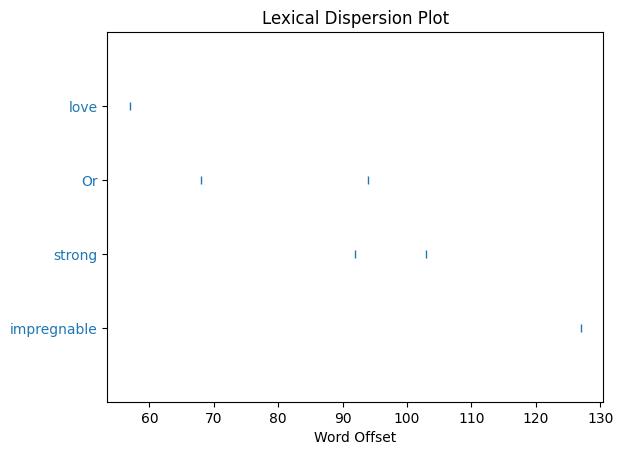

In [42]:
#як я зрозумів, реверс
words = ["impregnable", "strong", "Or", "love"]
text.dispersion_plot(words)

In [46]:
freqdist = nltk.FreqDist(text)
hapaxes = freqdist.hapaxes()
print(len(hapaxes), len(text))

82 133


In [23]:
import re

def monetary(text):
    pattern = r'\$\d+(?:\.\d{2})?'
    return re.findall(pattern, text)
     


text = "The total cost is $1234.56,  first amount is $123.45, second amount is $400. The product costs $2500."
monetary_amounts = monetary(text)
total = 0
for value in monetary_amounts:
    total+=float(value[1:])

print("Monetary", monetary_amounts)
print("Total", total)


Monetary ['$1234.56', '$123.45', '$400', '$2500']
Total 4258.01


In [47]:
import json


json_data = {
    "HTTPHost": "localhost",
    "HTTPPort": 8545,
    "Config": {
        "Enabled": True,
        "Server": "wakuv2.prod",
        "Nodes": ["8.210.222.231", "168.166.125.145", "8.123.456.789"]
    }
}

In [49]:
pattern = re.compile(r'^8\.')
json_data["Config"]["Nodes"] = [node for node in json_data["Config"]["Nodes"] if not pattern.match(node)]
print(json.dumps(json_data, indent=2))

{
  "HTTPHost": "localhost",
  "HTTPPort": 8545,
  "Config": {
    "Enabled": true,
    "Server": "wakuv2.prod",
    "Nodes": [
      "168.166.125.145"
    ]
  }
}


In [51]:
def replace(entry):
    pattern = re.compile(r'^(?P<name>\w+)\.(?P<type>\w+)$')
    match = pattern.match(entry)
    return {"name": match.group('name'), "type": match.group('type')} if match else entry


In [52]:
json_data["Config"]["Server"] = replace(json_data["Config"]["Server"])

print(json.dumps(json_data, indent=2))

{
  "HTTPHost": "localhost",
  "HTTPPort": 8545,
  "Config": {
    "Enabled": true,
    "Server": {
      "name": "wakuv2",
      "type": "prod"
    },
    "Nodes": [
      "168.166.125.145"
    ]
  }
}
